In [23]:
import numpy as np 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1 - Dataset

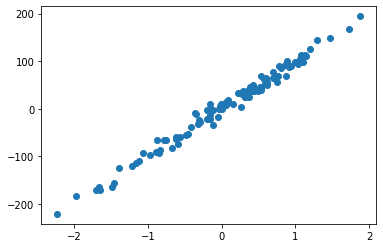

In [24]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x, y)

In [25]:
y = y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [26]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))
X

array([[ 0.37944071,  1.        ],
       [-0.48960099,  1.        ],
       [ 0.88395241,  1.        ],
       [ 0.59729541,  1.        ],
       [ 0.35652708,  1.        ],
       [-0.16001049,  1.        ],
       [ 0.31820757,  1.        ],
       [-0.62273104,  1.        ],
       [ 0.52049342,  1.        ],
       [ 0.4109194 ,  1.        ],
       [ 0.42124229,  1.        ],
       [-0.66937437,  1.        ],
       [ 0.91188494,  1.        ],
       [-0.56337638,  1.        ],
       [-0.62498112,  1.        ],
       [ 1.4680643 ,  1.        ],
       [ 0.58516648,  1.        ],
       [ 0.15461672,  1.        ],
       [ 0.28388753,  1.        ],
       [ 0.36726511,  1.        ],
       [ 1.19301975,  1.        ],
       [-0.78395257,  1.        ],
       [ 0.33597974,  1.        ],
       [-1.9694327 ,  1.        ],
       [ 0.99522545,  1.        ],
       [-0.96747299,  1.        ],
       [ 0.70179788,  1.        ],
       [-2.22634411,  1.        ],
       [-0.84753678,

In [27]:
theta = np.random.randn(2, 1)
theta

array([[1.37661837],
       [0.06663936]])

# 2 - Modèle

In [28]:
def model(X, theta):
    return X.dot(theta)

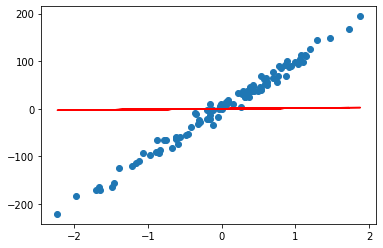

In [30]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c = 'r')

# 3 - Fonction coût

In [32]:
# Erreur quadratique moyenne
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [33]:
cost_function(X, y, theta)

3356.300486593489

# 4 - Gradient et Descente de gradient

In [37]:
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [55]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5 - Entrainement du modèle

In [56]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)
theta_final

array([[98.59173023],
       [ 0.81470634]])

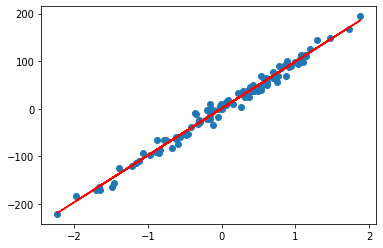

In [47]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c = 'r')

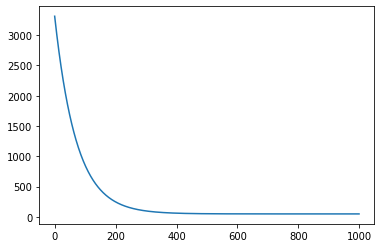

In [57]:
plt.plot(range(1000), cost_history)

# 6 - Calcul de R carré

In [59]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [60]:
coef_determination(y, predictions)

0.9855930657761169